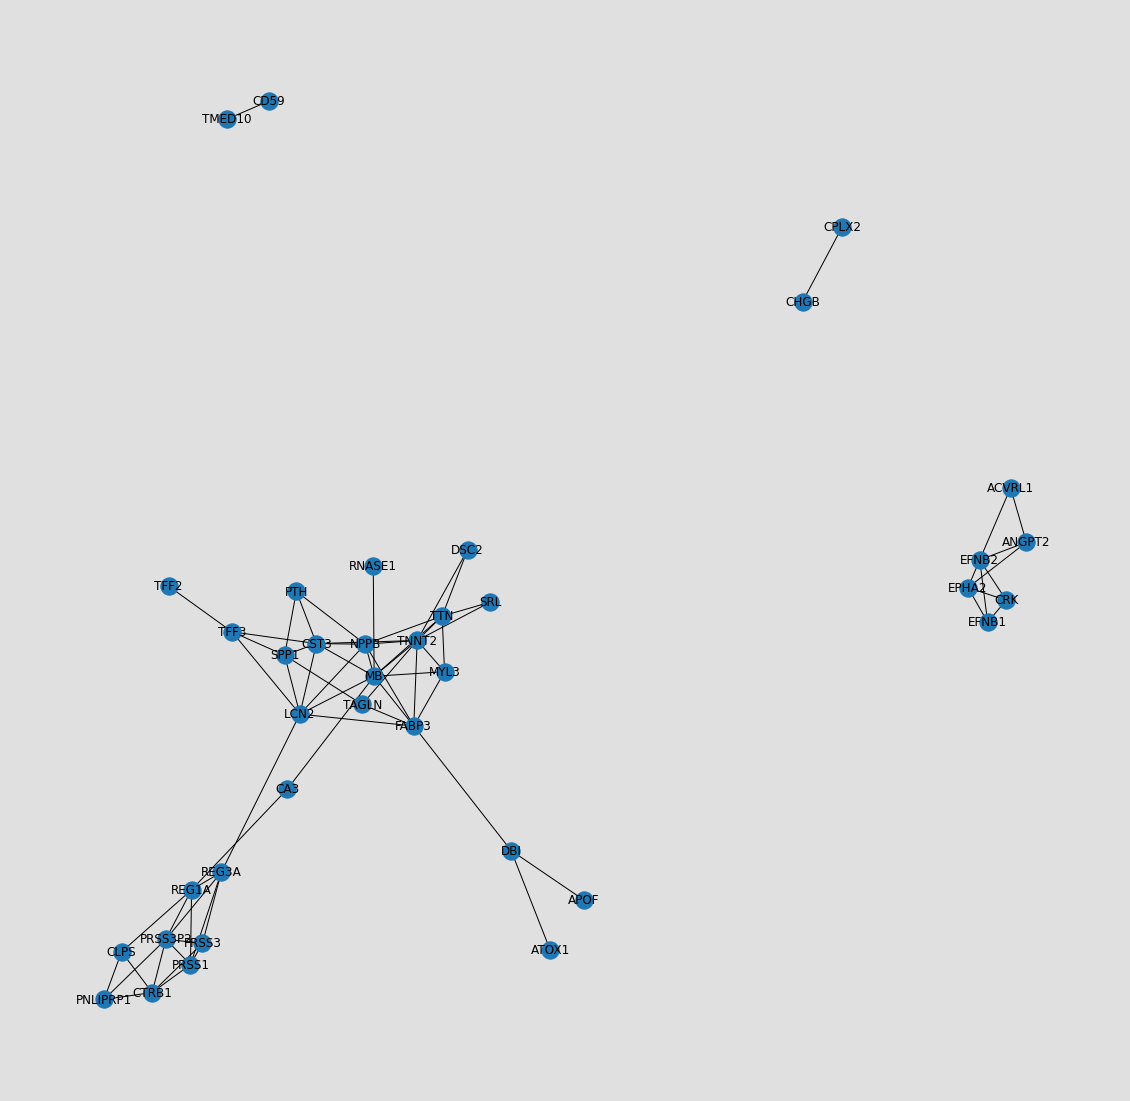

In [13]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install networkx


### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

protein_list = ['P07108','P61956','P49755','P01034','Q07654','P17900','O00244','Q02487','P98172','P07998','Q86TD4','P05451','P41271','P05060','Q92626','Q2UY09','Q9NS68','Q01974','P37023','Q6PUV4','Q9Y3E2','Q93091','Q01995','P45379','Q9H665','P07478','Q06141','Q8WZ42','Q8IYJ0','P02144','P80188','P84157','P29317','P05413','Q16832','P19438','P10451','P13987','P58062','P46108','P35030','P04118','Q9NXW2','Q03403','Q9Y5H3','P63302','P08590','Q6UY11','P54315','P52799','P01270','Q13790','P07451','P07477','P28325','P07306','P01861','P17538','Q9NZ72','P16860','O15123','P16860','P51858']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(20,20),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]
# use the matplotlib plasma colormap
graph_colormap = cm.get_cmap('plasma', 12)
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.0,0.9) 
c = [graph_colormap(i) for i in c]
# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,7000)
# edge width shows 1-weight to convert cost back to strength of interaction 
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec = [graph_colormap(i) for i in ec]


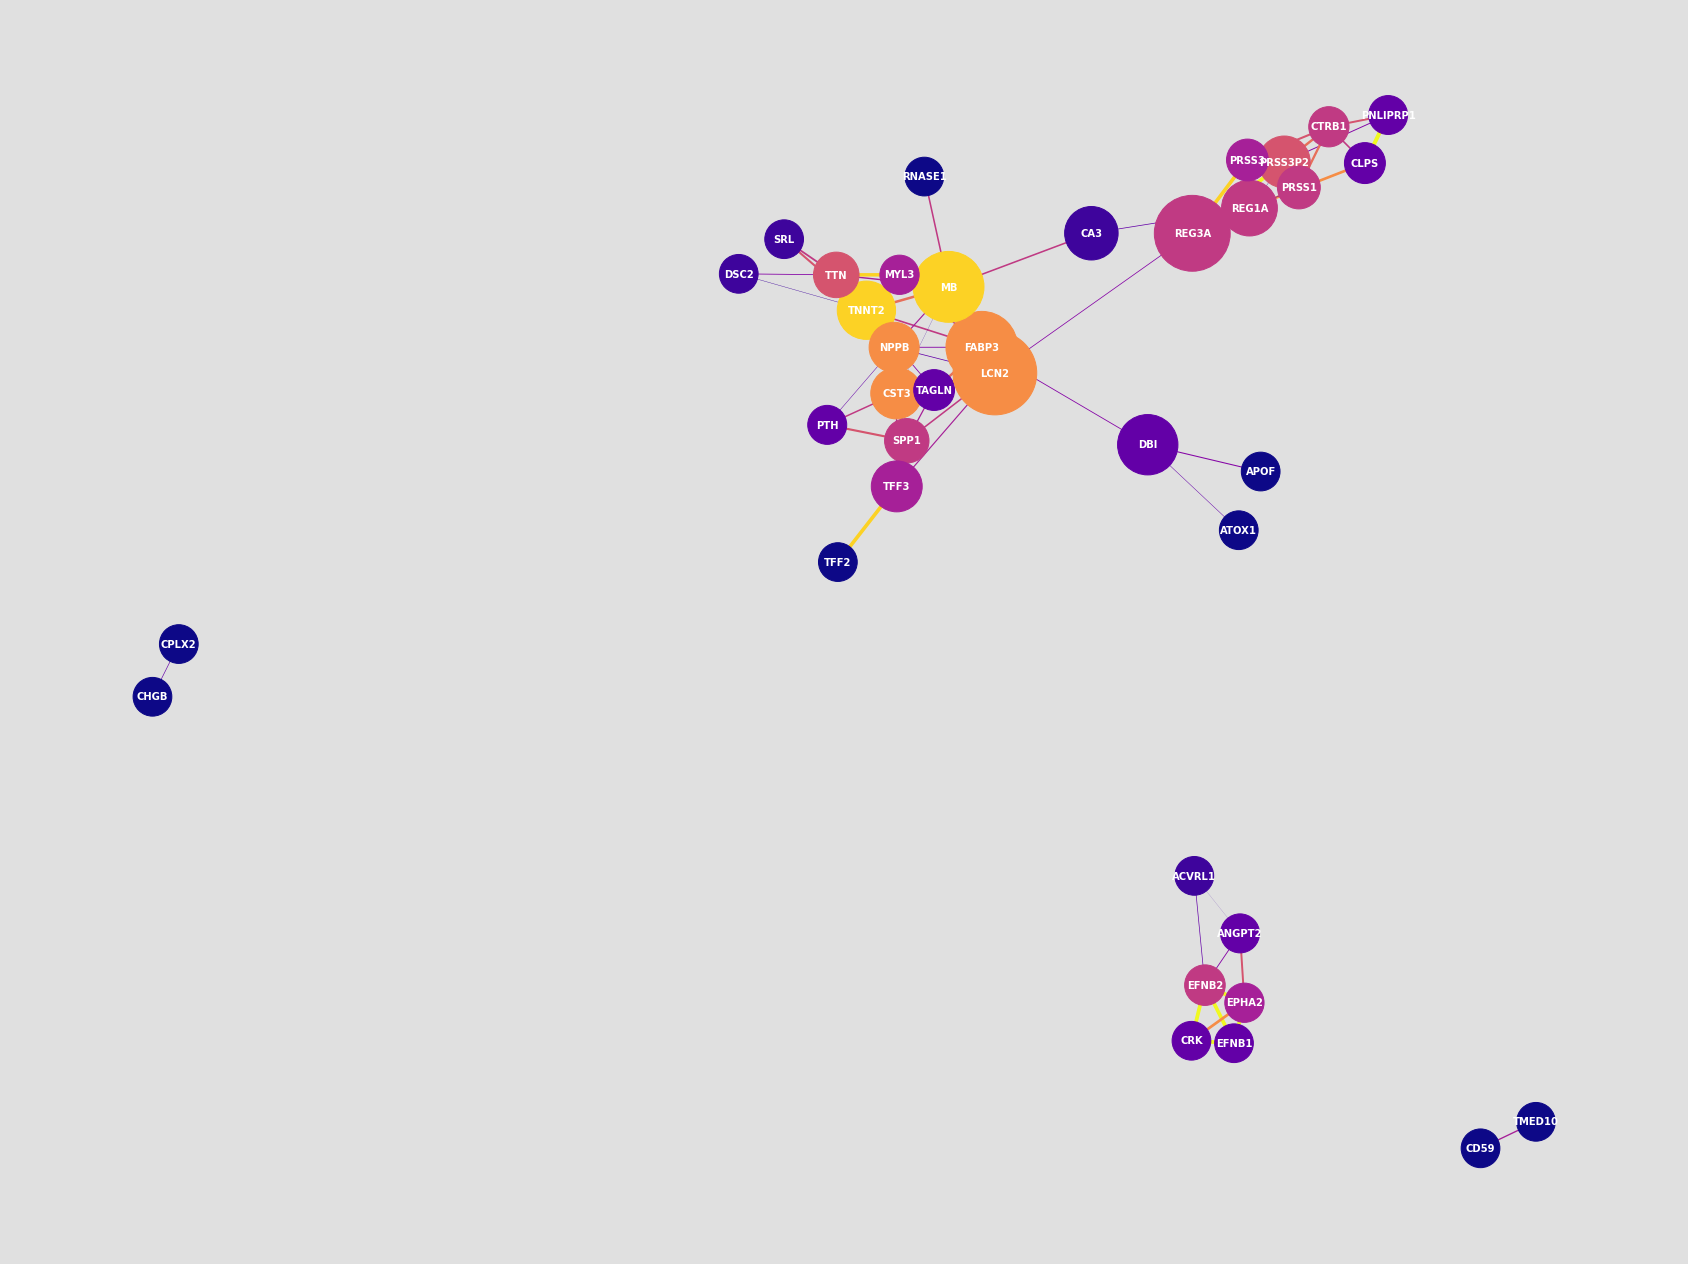

In [23]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,23),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                 font_color='white',font_weight='bold',font_size='10')
plt.axis('off')
plt.show()

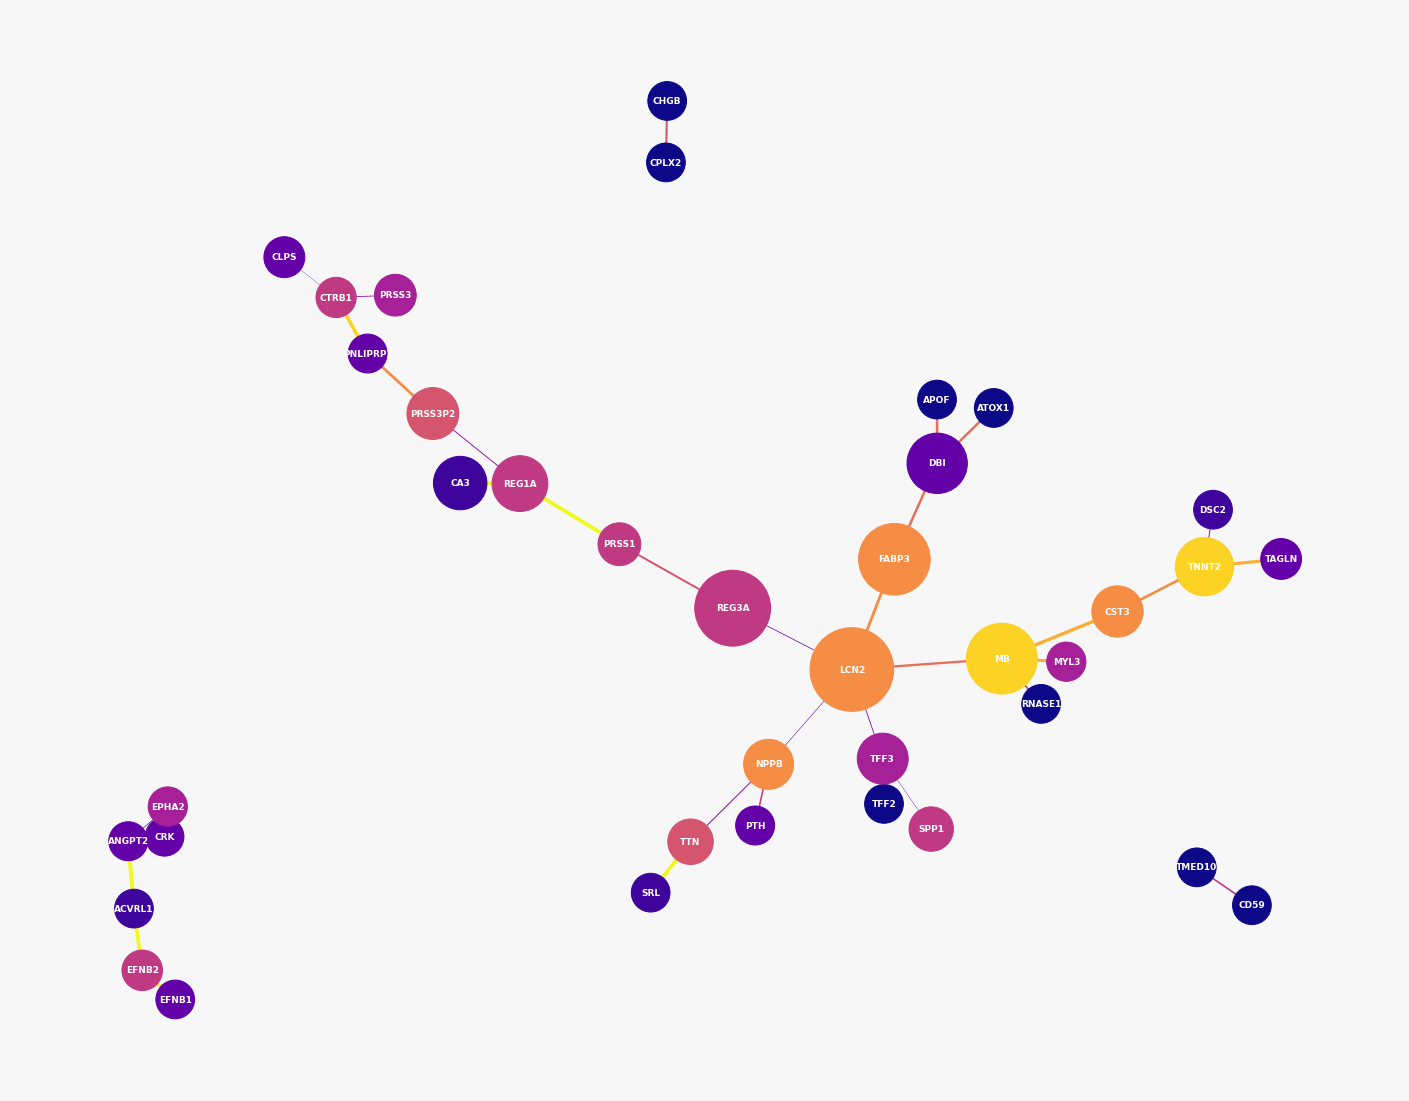

In [27]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(25,20),facecolor=[0.7,0.7,0.7,0.1])
nx.draw_networkx(T, pos=pos, with_labels=True,node_color=c,node_size=s,edge_color= ec,width=ew,
                font_color='white',font_weight='bold',font_size='9')
plt.axis('off')
plt.show()